<a href="https://colab.research.google.com/github/cagansevencan/Needleman-Wunsch-Alzheimers/blob/master/Progressive_Alignment-collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progressive Alignment

 Comparing run times dynamic programming approach

In [0]:
%pylab inline
from __future__ import division, print_function
from functools import partial
from IPython.core import page
page.page = print

Populating the interactive namespace from numpy and matplotlib


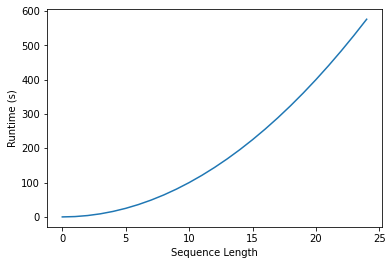

In [0]:
import matplotlib.pyplot as plt

seq_lengths = range(25)
s2_times = [t ** 2 for t in range(25)]

plt.plot(range(25), s2_times)
plt.xlabel('Sequence Length')
plt.ylabel('Runtime (s)')
plt.show()


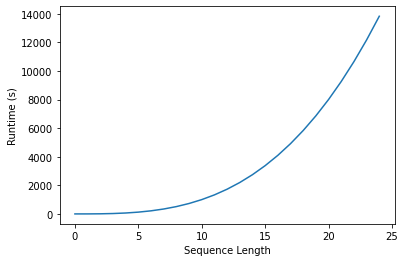

In [0]:
s3_times = [t ** 3 for t in range(25)]

plt.plot(range(25), s3_times)
plt.xlabel('Sequence Length')
plt.ylabel('Runtime (s)')
plt.show()

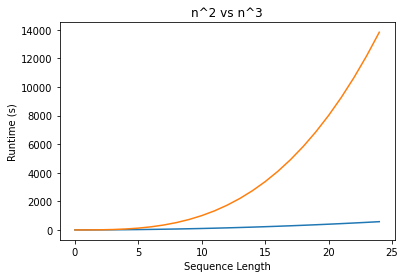

In [0]:

s2_times = [t ** 2 for t in range(25)]

plt.plot(range(25), s2_times)
plt.xlabel('Sequence Length')
plt.ylabel('Runtime (s)')

s3_times = [t ** 3 for t in range(25)]

plt.plot(range(25), s3_times)
plt.xlabel('Sequence Length')
plt.ylabel('Runtime (s)')
plt.title('n^2 vs n^3')
plt.show()

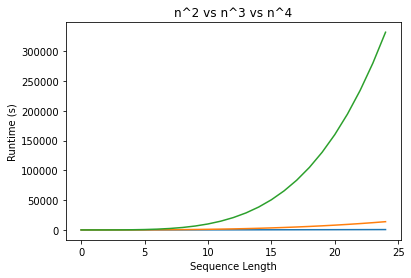

In [0]:
s4_times = [t ** 4 for t in range(25)]

plt.plot(range(25), s2_times)
plt.plot(range(25), s3_times)
plt.plot(range(25), s4_times)
plt.xlabel('Sequence Length')
plt.ylabel('Runtime (s)')
plt.title('n^2 vs n^3 vs n^4')
plt.show()

In [0]:
!pip install scikit-bio

In [0]:
import skbio

In [0]:
import scipy as sp

Testing k-mer approach

In [0]:
from skbio import DNA
%psource DNA.iter_kmers

    @stable(as_of="0.4.0")
    def iter_kmers(self, k, overlap=True):
        r"""Generate kmers of length `k` from this sequence.

        Parameters
        ----------
        k : int
            The kmer length.
        overlap : bool, optional
            Defines whether the kmers should be overlapping or not.

        Yields
        ------
        Sequence
            kmer of length `k` contained in this sequence.

        Raises
        ------
        ValueError
            If `k` is less than 1.

        Examples
        --------
        >>> from skbio import Sequence
        >>> s = Sequence('ACACGACGTT')
        >>> for kmer in s.iter_kmers(4, overlap=False):
        ...     str(kmer)
        'ACAC'
        'GACG'
        >>> for kmer in s.iter_kmers(3, overlap=True):
        ...     str(kmer)
        'ACA'
        'CAC'
        'ACG'
        'CGA'
        'GAC'
        'ACG'
        'CGT'
        'GTT'

        """
        if k < 1:
            raise ValueError("k must be gre

In [0]:
with open("APOE Variant 1.txt") as myfile:
  txt1 = myfile.read()
txt1 = txt1.replace('\n','')
print(txt1)

with open("APOE Variant 5.txt") as myfile5:
  txt5 = myfile5.read()
txt5 = txt5.replace('\n','')
print(txt5)


#s = Sequence(txt1)
#for kmer in s.iter_kmers(20, overlap=False):
 #       print(kmer)


ATGAGCTCAGGGGCCTCTAGAAAGAGCTGGGACCCTGGGAACCCCTGGCCTCCAGACTGGCCAATCACAGGCAGGAAGATGAAGGTTCTGTGGGCTGCGTTGCTGGTCACATTCCTGGCAGGATGCCAGGCCAAGGTGGAGCAAGCGGTGGAGACAGAGCCGGAGCCCGAGCTGCGCCAGCAGACCGAGTGGCAGAGCGGCCAGCGCTGGGAACTGGCACTGGGTCGCTTTTGGGATTACCTGCGCTGGGTGCAGACACTGTCTGAGCAGGTGCAGGAGGAGCTGCTCAGCTCCCAGGTCACCCAGGAACTGAGGGCGCTGATGGACGAGACCATGAAGGAGTTGAAGGCCTACAAATCGGAACTGGAGGAACAACTGACCCCGGTGGCGGAGGAGACGCGGGCACGGCTGTCCAAGGAGCTGCAGGCGGCGCAGGCCCGGCTGGGCGCGGACATGGAGGACGTGTGCGGCCGCCTGGTGCAGTACCGCGGCGAGGTGCAGGCCATGCTCGGCCAGAGCACCGAGGAGCTGCGGGTGCGCCTCGCCTCCCACCTGCGCAAGCTGCGTAAGCGGCTCCTCCGCGATGCCGATGACCTGCAGAAGCGCCTGGCAGTGTACCAGGCCGGGGCCCGCGAGGGCGCCGAGCGCGGCCTCAGCGCCATCCGCGAGCGCCTGGGGCCCCTGGTGGAACAGGGCCGCGTGCGGGCCGCCACTGTGGGCTCCCTGGCCGGCCAGCCGCTACAGGAGCGGGCCCAGGCCTGGGGCGAGCGGCTGCGCGCGCGGATGGAGGAGATGGGCAGCCGGACCCGCGACCGCCTGGACGAGGTGAAGGAGCAGGTGGCGGAGGTGCGCGCCAAGCTGGAGGAGCAGGCCCAGCAGATACGCCTGCAGGCCGAGGCCTTCCAGGCCCGCCTCAAGAGCTGGTTCGAGCCCCTGGTGGAAGACATGCAGCGCCAGTGGGCCGGGCTGGTGGAGAAGGTGCAGGCTGCCGTGGGCACCA

In [0]:
with open("APOE Variant 1.txt") as myfile:
  txt1 = myfile.read()
txt1 = txt1.replace('\n','')
#print(txt1)

with open("APOE Variant 2.txt") as myfile:
  txt2 = myfile.read()
txt2 = txt2.replace('\n','')
#print(txt2)

with open("APOE Variant 3.txt") as myfile:
  txt3 = myfile.read()
txt3 = txt3.replace('\n','')
#print(txt3)

with open("APOE Variant 4.txt") as myfile:
  txt4 = myfile.read()
txt4 = txt4.replace('\n','')
#print(txt4)


with open("APOE Variant 5.txt") as myfile:
  txt5 = myfile.read()
txt5 = txt5.replace('\n','')
#print(txt5)

with open("Cloning Vector APOE2.txt") as myfile:
  v2 = myfile.read()
v2 = v2.replace('\n','')
#print(v2)

with open("Cloning Vector APOE3.txt") as myfile:
  v3 = myfile.read()
v3 = v3.replace('\n','')
#print(v3)

with open("APOELocal.txt") as myfile:
  txtL = myfile.read()
txtL = txtL.replace('\n','')
#print(txtL)


with open("ABCA7 - Brown Rat.txt") as myfile:
  txtBRat = myfile.read()
txtBRat = txtBRat.replace('\n','')
#print(txtBRat)

with open("ABCA7 - House Mouse V1.txt") as myfile:
  txtHV1 = myfile.read()
txtHV1 = txtHV1.replace('\n','')
#print(txtHV1)

with open("ABCA7 House Mouse V2.txt") as myfile:
  txtHV2 = myfile.read()
txtHV2 = txtHV2.replace('\n','')
#print(txtHV2)

with open("ABCA7 Human.txt") as myfile:
  txtHum = myfile.read()
txtHum = txtHum.replace('\n','')
#print(txtHum)

with open("ABCA7 Brown Rat Cut.txt") as myfile:
  ratCut = myfile.read()
ratCut = ratCut.replace('\n','')
#print(ratCut)

with open("ABCA7 House M1 Cut.txt") as myfile:
  m1Cut = myfile.read()
m1Cut = m1Cut.replace('\n','')
#print(m1Cut)

with open("ABCA7 House M2 Cut.txt") as myfile:
  m2Cut = myfile.read()
m2Cut = m2Cut.replace('\n','')
#print(m2Cut)

with open("ABCA7 Human Cut.txt") as myfile:
  hCut = myfile.read()
hCut = hCut.replace('\n','')
#print(hCut)


#s = Sequence(txt1)
#for kmer in s.iter_kmers(20, overlap=False):
 #       print(kmer)


Compute the kmer distance between pair of sequences


In [0]:
def kmer_distance(sequence1, sequence2, k=7, overlap=False):
    """Compute the kmer distance between a pair of sequences
    Parameters
    ----------
    sequence1 : skbio.Sequence
    sequence2 : skbio.Sequence
    k : int, optional
        The word length.
    overlapping : bool, optional
        Defines whether the k-words should be overlapping or not
        overlapping.
    Returns
    -------
    float
        Fraction of the set of k-mers from both sequence1 and
        sequence2 that are unique to either sequence1 or
        sequence2.
    Raises
    ------
    ValueError
        If k < 1.
    Notes
    -----
    k-mer counts are not incorporated in this distance metric.
    """
    sequence1_kmers = set(map(str, sequence1.iter_kmers(k, overlap)))
    sequence2_kmers = set(map(str, sequence2.iter_kmers(k, overlap)))
    all_kmers = sequence1_kmers | sequence2_kmers
    shared_kmers = sequence1_kmers & sequence2_kmers
    number_unique = len(all_kmers) - len(shared_kmers)
    fraction_unique = number_unique / len(all_kmers)
    return fraction_unique
   

In [0]:
s1 = DNA("ACCGGTGACCAGTTGACCAGT")
s2 = DNA("ATCGGTACCGGTAGAAGT")
s3 = DNA("GGTACCAAATAGAA")
"""
apoe1 = DNA(txt1)
print(txt1)
apoe2 = DNA(txt2)
print(txt2)
apoe3 = DNA(txt3)
print(txt3)
apoe4 = DNA(txt4)
print(txt4)
apoe5 = DNA(txt5)
print(apoe5)

cloningApoe2 = DNA(v2)
print(cloningApoe2)
cloningApoe3 = DNA(v3)
print(cloningApoe3)
apoeL = DNA(txtL)
print(apoeL)
genAlz = DNA(txt99)
print(genAlz)
"""
BrownRat = DNA(txtBRat)
print(BrownRat)
HouseM1 = DNA(txtHV1)
print(HouseM1)
HouseM2 = DNA(txtHV2)
print(HouseM2)
HumanA = DNA(txtHum)
print(HumanA)


ratCut = DNA(ratCut)
print(ratCut)

m1Cut = DNA(m1Cut)
print(m1Cut)

m2Cut = DNA(m2Cut)
print(m2Cut)

hCut = DNA(hCut)
print(hCut)

print(kmer_distance(HouseM2, HouseM1, k=7, overlap=False))


print(HumanA.distance(HouseM1, kmer_distance))
print(HouseM1.distance(HouseM2, kmer_distance))

ATGGCTTTCTGCACACAGTTGATGCTCCTACTGTGGAAAAATTACACATATCGACGGAGACAACCGATCCAACTAGTAGTGGAGTTACTGTGGCCCCTCTTCCTCTTCTTCATCCTAGTGGCCGTCCGTCACTCACACCCCCCACTGGAGCACCACGAATGCCACTTTCCAAACAAGCCACTACCATCAGCGGGCACGGTGCCCTGGCTGCAGGGCCTTGTCTGCAACGTAAATAACTCCTGCTTCCAACACCCAACGCCTGGAGAGAAGCCTGGCGTCCTGAGCAACTTTAAGGATTCCTTGATCTCGAGGCTCCTTGCCGATGCTCACACAGTGCTGGGGGGCCACAGCACCCAGGACATGCTGGCTGCCCTGGGGAAACTGATCCCCGTGCTCAGGGCTGTTGGGAGCGGAGCCTGGCCACAGGAGAGTAACCAACCGGCTAAGCAAGGGTCAGTGACTGAGCTCTTGGAGAAGATCCTGCAACGGGCATCCCTGGAGACCGTGCTGGGTCAAGCCCAGGATTCCATGAGAAAGTTCTCAGATGCTACCAGAACTGTTGCCCAGGAGCTCCTGACGCTACCCAGCCTTGTGGAACTCCGGGCTTTGCTGCGGAGGCCCCGAGGGTCAGCTGGCTCTCTGGAGCTGATTTCGGAGGCCCTCTGCAGTACCAAGGGGCCCAGCAGTCCAGGGGGTCTGTCCCTCAACTGGTACGAAGCCAACCAGATCAACGAATTCATGGGGCCTGAGCTGGCGCCCACCCTGCCTGACAGCAGTCTCAGCCCCGCCTGCTCTGAGTTCGTGGGGGCACTGGATGACCACCCTGTGTCTCGGCTGCTCTGGAGACGCCTGAAGCCATTGATCCTCGGGAAAATTCTCTTTGCACCTGACACAAACTTCACTAGGAAACTCATGGCTCAGGTGAACCAGACCTTTGAGGAGCTGGCTCTGCTGAGGGACCTACACGAACTCTGGGGAGTACTGGGACCCCAGATCTTCA

def hamming(seq1, seq2):
"""Compute Hamming distance between two sequences.
    The Hamming distance between two equal-length sequences is the proportion
    of differing characters.

If we wanted to override the default to create (for example) a 5-mer distance function, we could use functools.partial.

In [0]:
fivemer_distance = partial(kmer_distance, k=5)

s1 = DNA("ACCGGTGACCAGTTGACCAGT")
s2 = DNA("ATCGGTACCGGTAGAAGT")
s3 = DNA("GGTACCAAATAGAA")



print(s1.distance(s2, fivemer_distance))
print(s1.distance(s3, fivemer_distance))

1.0
1.0


Now we can apply one of these func. to build a distance matrix for a set of sequences that we need to align.


In [0]:
query_of_sequences = [DNA(BrownRat, {"id": "s1"}),
                      DNA(HouseM1, {"id": "s2"}),
                      DNA(HouseM2, {"id": "s3"}),
                      DNA(HumanA, {"id": "s4"})
                      ]

Setting metric as our kmer_distance function will return the related distances.

In [0]:
from skbio import DistanceMatrix

guide_dm = DistanceMatrix.from_iterable(query_of_sequences, metric=kmer_distance, key='id')
#%psource DistanceMatrix

scikit-bio contains basic visualization functionality for these objects. For ex, we can visualize it as a heatmap.

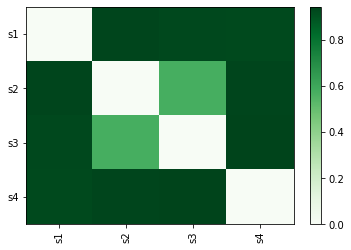

In [0]:
fig = guide_dm.plot(cmap='Greens')

SciPy has the functionality to visualize UPGMA, and print out dendogram.

ATGGCTTTCTGCACACAGTTGATGCTCCTACTGTGGAAAAATTACACATATCGACGGAGACAACCGATCCAACTAGTAGTGGAGTTACTGTGGCCCCTCTTCCTCTTCTTCATCCTAGTGGCCGTCCGTCACTCACACCCCCCACTGGAGCACCACGAATGCCACTTTCCAAACAAGCCACTACCATCAGCGGGCACGGTGCCCTGGCTGCAGGGCCTTGTCTGCAACGTAAATAACTCCTGCTTCCAACACCCAACGCCTGGAGAGAAGCCTGGCGTCCTGAGCAACTTTAAGGATTCCTTGATCTCGAGGCTCCTTGCCGATGCTCACACAGTGCTGGGGGGCCACAGCACCCAGGACATGCTGGCTGCCCTGGGGAAACTGATCCCCGTGCTCAGGGCTGTTGGGAGCGGAGCCTGGCCACAGGAGAGTAACCAACCGGCTAAGCAAGGGTCAGTGACTGAGCTCTTGGAGAAGATCCTGCAACGGGCATCCCTGGAGACCGTGCTGGGTCAAGCCCAGGATTCCATGAGAAAGTTCTCAGATGCTACCAGAACTGTTGCCCAGGAGCTCCTGACGCTACCCAGCCTTGTGGAACTCCGGGCTTTGCTGCGGAGGCCCCGAGGGTCAGCTGGCTCTCTGGAGCTGATTTCGGAGGCCCTCTGCAGTACCAAGGGGCCCAGCAGTCCAGGGGGTCTGTCCCTCAACTGGTACGAAGCCAACCAGATCAACGAATTCATGGGGCCTGAGCTGGCGCCCACCCTGCCTGACAGCAGTCTCAGCCCCGCCTGCTCTGAGTTCGTGGGGGCACTGGATGACCACCCTGTGTCTCGGCTGCTCTGGAGACGCCTGAAGCCATTGATCCTCGGGAAAATTCTCTTTGCACCTGACACAAACTTCACTAGGAAACTCATGGCTCAGGTGAACCAGACCTTTGAGGAGCTGGCTCTGCTGAGGGACCTACACGAACTCTGGGGAGTACTGGGACCCCAGATCTTCA

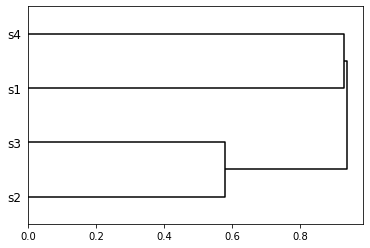

In [0]:
from scipy.cluster.hierarchy import average, dendrogram, to_tree

for q in query_of_sequences:
    print(q)

guide_lm = average(guide_dm.condensed_form())
print(guide_dm)
guide_d = dendrogram(guide_lm, labels=guide_dm.ids, orientation='right',
                     link_color_func=lambda x: 'black')
guide_tree = to_tree(guide_lm)

Build a UPGMA tree by applying metric to sequences:




In [0]:
def guide_tree_from_sequences(sequences, metric= kmer_distance, display_tree=False):
  guide_dm = DistanceMatrix.from_iterable(sequences, metric=metric, key= 'id')
  guide_lm = sp.cluster.hierarchy.average(guide_dm.condensed_form())
  guide_tree = to_tree(guide_lm)
  if display_tree:
      guide_d = sp.cluster.hierarchy.dendrogram(guide_lm, labels=guide_dm.ids, orientation='right',
              link_color_func=lambda x: 'black')
  return guide_tree

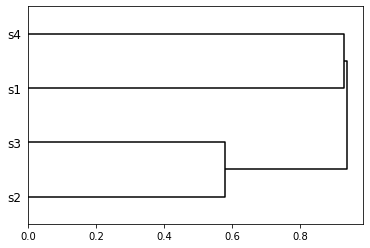

In [0]:
t = guide_tree_from_sequences(query_of_sequences, display_tree=True)

# Now that we have guide tree, we can move onto progressive alignment.

This part will adapt Needleman-Wunsch to support alinging a sequence to an alignment, as well as alignment to an alignment.

In [0]:
def format_dynamic_programming_matrix(seq1, seq2, matrix, cell_width=6):
    """ define a function for formatting dynamic programming matrices
    """
    lines = []

    if isinstance(seq1, TabularMSA):
        seq1 = str(seq1[0])
    if isinstance(seq2, TabularMSA):
        seq2 = str(seq2[0])
    cell_format = "%" + str(cell_width) + "s"
    line_format = cell_format * (len(seq1) + 2)
    # print seq1 (start the line with two empty strings)
    lines.append(line_format % tuple([' ',' '] + [str(s) for s in list(seq1)]))

    # iterate over the rows and print each (starting with the
    # corresponding base in sequence2)
    for row, base in zip(matrix,' ' + seq2):
        row_list = [base]
        for s in row:
            if isinstance(s, np.float):
                s = str(s)
            else:
                s = s.decode('ascii')
            row_list.append(s)
        line = line_format % tuple(row_list)
        lines.append(line)

    return '\n'.join(lines)

In [0]:
def format_traceback_matrix(seq1, seq2, matrix, cell_width=6):
    if isinstance(seq1, TabularMSA):
        seq1 = str(seq1[0])
    if isinstance(seq2, TabularMSA):
        seq2 = str(seq2[0])
    translated_m = np.chararray(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            translated_m[i, j] = traceback_decoding[matrix[i, j]]

    return format_dynamic_programming_matrix(seq1, seq2, translated_m,
                                             cell_width)

In [0]:
from skbio.alignment._pairwise import _compute_score_and_traceback_matrices
#%psource _compute_score_and_traceback_matrices



```
# def _compute_score_and_traceback_matrices(
        aln1, aln2, gap_open_penalty, gap_extend_penalty, substitution_matrix,
        new_alignment_score=-np.inf, init_matrices_f=_init_matrices_nw,
        penalize_terminal_gaps=True, gap_substitution_score=0):
```



A note on the ``penalize_terminal_gaps`` parameter. When this value is
    ``False``, this function is no longer true Smith-Waterman/Needleman-Wunsch
    scoring, but when ``True`` it can result in biologically irrelevant
    artifacts in Needleman-Wunsch (global) alignments. Specifically, if one
    sequence is longer than the other (e.g., if aligning a primer sequence to
    an amplification product, or searching for a gene in a genome) the shorter
    sequence will have a long gap inserted. The parameter is ``True`` by
    default (so that this function computes the score and traceback matrices as
    described by the original authors) but the global alignment wrappers pass
    ``False`` by default, so that the global alignment API returns the result
    that users are most likely to be looking for.

In [0]:
def _traceback(traceback_matrix, score_matrix, aln1, aln2, start_row,
               start_col):
    # cache some values for simpler reference
    aend = _traceback_encoding['alignment-end']
    match = _traceback_encoding['match']
    vgap = _traceback_encoding['vertical-gap']
    hgap = _traceback_encoding['horizontal-gap']
    gap_character = aln1.dtype.default_gap_char

    # initialize the result alignments
    aln1_sequence_count = aln1.shape.sequence
    aligned_seqs1 = [[] for e in range(aln1_sequence_count)]

    aln2_sequence_count = aln2.shape.sequence
    aligned_seqs2 = [[] for e in range(aln2_sequence_count)]

    current_row = start_row
    current_col = start_col

    best_score = score_matrix[current_row, current_col]
    current_value = None

    while current_value != aend:
        current_value = traceback_matrix[current_row, current_col]

        if current_value == match:
            for aligned_seq, input_seq in zip(aligned_seqs1, aln1):
                aligned_seq.append(str(input_seq[current_col-1]))
            for aligned_seq, input_seq in zip(aligned_seqs2, aln2):
                aligned_seq.append(str(input_seq[current_row-1]))
            current_row -= 1
            current_col -= 1
        elif current_value == vgap:
            for aligned_seq in aligned_seqs1:
                aligned_seq.append(gap_character)
            for aligned_seq, input_seq in zip(aligned_seqs2, aln2):
                aligned_seq.append(str(input_seq[current_row-1]))
            current_row -= 1
        elif current_value == hgap:
            for aligned_seq, input_seq in zip(aligned_seqs1, aln1):
                aligned_seq.append(str(input_seq[current_col-1]))
            for aligned_seq in aligned_seqs2:
                aligned_seq.append(gap_character)
            current_col -= 1
        elif current_value == aend:
            continue
        else:
            raise ValueError(
                "Invalid value in traceback matrix: %s" % current_value)

    for i, (aligned_seq, original) in enumerate(zip(aligned_seqs1, aln1)):
        aligned_seq = ''.join(aligned_seq)[::-1]
        constructor = aln1.dtype
        metadata = None
        if original.has_metadata():
            metadata = original.metadata
        aligned_seqs1[i] = constructor(aligned_seq, metadata=metadata,
                                       validate=False)

    for i, (aligned_seq, original) in enumerate(zip(aligned_seqs2, aln2)):
        aligned_seq = ''.join(aligned_seq)[::-1]
        constructor = aln2.dtype
        metadata = None
        if original.has_metadata():
            metadata = original.metadata
        aligned_seqs2[i] = constructor(aligned_seq, metadata=metadata,
                                       validate=False)

    return aligned_seqs1, aligned_seqs2, best_score, current_col, current_row

Default ``match_score``, ``mismatch_score``, ``gap_open_penalty`` and
    ``gap_extend_penalty`` parameters are derived from the NCBI BLAST

    This function can be use to align either a pair of sequences, a pair of
    alignments, or a sequence and an alignment

In [0]:
from skbio.alignment import global_pairwise_align_nucleotide
%psource global_pairwise_align_nucleotide

@experimental(as_of="0.4.0")
def global_pairwise_align_nucleotide(seq1, seq2, gap_open_penalty=5,
                                     gap_extend_penalty=2,
                                     match_score=1, mismatch_score=-2,
                                     substitution_matrix=None,
                                     penalize_terminal_gaps=False):
    """Globally align nucleotide seqs or alignments with Needleman-Wunsch

    Parameters
    ----------
    seq1 : DNA, RNA, or TabularMSA[DNA|RNA]
        The first unaligned sequence(s).
    seq2 : DNA, RNA, or TabularMSA[DNA|RNA]
        The second unaligned sequence(s).
    gap_open_penalty : int or float, optional
        Penalty for opening a gap (this is substracted from previous best
        alignment score, so is typically positive).
    gap_extend_penalty : int or float, optional
        Penalty for extending a gap (this is substracted from previous best
        alignment score, so is typically positive).
    match_score :

Right below is the faster(heuristic) version of local alignment only(Smith-Waterman), faster global alignment not yet avaliable for Needleman.

In [0]:
from skbio.alignment import local_pairwise_align_ssw

To give an example, we will override one of the global_pairwise_align_nucleotide defaults to penalize terminal gaps. This effectively tells the algorithm that we know we have a collection of sequences that are homologous(share a common ancestor) from beginning to end.

In [0]:
global_pairwise_align_nucleotide = partial(global_pairwise_align_nucleotide, penalize_terminal_gaps=True)


We can still use this code to align pair of sequences, but since we set our penalize_terminal_gaps portion to True. We will need to pass those sequences in as a pair of one-item lists:

In [0]:
 aln1, _, _ = global_pairwise_align_nucleotide(query_of_sequences[0], query_of_sequences[1])
print(aln1)

/usr/local/lib/python3.6/dist-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


In [0]:
 aln1, _, _ = local_pairwise_align_ssw(query_of_sequences[0], query_of_sequences[1])
(aln1)

We can now align this alignment progressively to one of our other sequences.

In [0]:
aln1, _, _ = global_pairwise_align_nucleotide(aln1, query_of_sequences[2])
print(aln1)

Running only sequences with Smith algo, since it returns the same result but faster

In [0]:
aln2, _, _ = local_pairwise_align_ssw(query_of_sequences[2], query_of_sequences[3])
(aln2)

Finally, as our progressive alignment process we can align both previous alingments together:

In [0]:
aln3, _, _  = global_pairwise_align_nucleotide(aln1, aln2)
print(aln3)

We can finally combine all of these steps to take a set of query sequences->build a guide tree-> perform progressive multiple sequence alignment, and finally return the guide tree and the alignment.

Representation of a node within a tree
    A `TreeNode` instance stores links to its parent and optional children
    nodes. In addition, the `TreeNode` can represent a `length` (e.g., a
    branch length) between itself and its parent. Within this object, the use
    of "children" and "descendants" is frequent in the documentation. A child
    is a direct descendant of a node, while descendants are all nodes that are
    below a given node (e.g., grand-children, etc).


In [0]:
from skbio import TreeNode
guide_tree = TreeNode.from_linkage_matrix(guide_lm, guide_dm.ids)

In [0]:
print(guide_tree)

Perform Progressive MSA of sequences:

In [0]:
def progressive_msa(sequences, pairwise_aligner, guide_tree=None,
                    metric=kmer_distance):
    """ 
    Parameters
    ----------
    sequences : skbio.SequenceCollection
        The sequences to be aligned. 
    metric : function, optional 
      Function that returns a single distance value when given a pair of
      skbio.Sequence objects. This will be used to build a guide tree if one
      is not provided.
    guide_tree : skbio.TreeNode, optional
        The tree that should be used to guide the alignment process.
    pairwise_aligner : function
        Function that should be used to perform the pairwise alignments,
        for example skbio.alignment.global_pairwise_align_nucleotide. Must
        support skbio.Sequence objects or skbio.TabularMSA objects
        as input.
        Try local_pairwise_align_ssw as well!
    Returns
    -------
    skbio.TabularMSA
    """

    if guide_tree is None:
        guide_dm = DistanceMatrix.from_iterable(
                        sequences, metric=metric, key='id')
        guide_lm = sp.cluster.hierarchy.average(guide_dm.condensed_form())
        guide_tree = TreeNode.from_linkage_matrix(guide_lm, guide_dm.ids)

    seq_lookup = {s.metadata['id']: s for i, s in enumerate(sequences)}
    c1, c2 = guide_tree.children
    if c1.is_tip():
        c1_aln = seq_lookup[c1.name]
    else:
        c1_aln = progressive_msa(sequences, pairwise_aligner, c1)

    if c2.is_tip():
        c2_aln = seq_lookup[c2.name]
    else:
        c2_aln = progressive_msa(sequences, pairwise_aligner, c2)

    alignment, _, _ = pairwise_aligner(c1_aln, c2_aln)
    # this is a temporary hack as the aligners in skbio 0.4.1 are dropping
    # metadata - this makes sure that the right metadata is associated with
    # the sequence after alignment
    if isinstance(c1_aln, Sequence):
        alignment[0].metadata = c1_aln.metadata
        len_c1_aln = 1
    else:
        for i in range(len(c1_aln)):
            alignment[i].metadata = c1_aln[i].metadata
        len_c1_aln = len(c1_aln)
    if isinstance(c2_aln, Sequence):
        alignment[1].metadata = c2_aln.metadata
    else:
        for i in range(len(c2_aln)):
            alignment[len_c1_aln + i].metadata = c2_aln[i].metadata

    return alignment

In [0]:
MSA = progressive_msa(query_of_sequences, pairwise_aligner=global_pairwise_align_nucleotide,
                      guide_tree=guide_tree)
print(MSA)
